# Assignment # 3 : Clustering Assignment.
## Data Science 450

In this assignment I would be using K-Means clustering to cluster browsing data of a shopping site with following primary pages: Home, Products, Search, Prod_A, Prod_B, Prod_C, Cart, Purchase.

Answer the following question based on various cluster runs.

- If a new user is observed to access the following pages:Home => Search => Prod_B, according to your clusters, what other product should be recommended to this user?
    - Product A : On taking a mean of cluster data with a K of 10, once we can clearly see that product A page is the highest visited page amongnst the three products.
- What if the new user has accessed the following sequence instead: Products => Prod_C?
    - Prodyct A : On taking a mean of cluster data with a K of 10, once we can clearly see that product A page is the highest visited page amongnst the three products.
- Using clustering help us identify casual browsers ("window shoppers"), focused browsers (those who seem to know what products they are looking for), and searchers (those using the search function to find items they want)? If so, are any of these groups show a higher orlower propensity to make a purchase?
- Do any of the segments show particular interest in one or more products, and if so, can we identify any special characteristics about their navigational behavior or their purchase propensity?
- If we know that, during the time of data collection, independent banner ads had been placed on some popular sites pointing to products A and B, can we identify segments corresponding to visitors that respond to the ads? If so, can we determine if either of these promotional campaigns are having any success?

## Load & examine the data set.

The function shown in the cell below loads the data from the .csv file. 
Execute the code in this cell to load the data into your notebook. Make sure you have the **.csv file** in your working directory!.

In [16]:
# Clear Workspace
rm(list=ls())
# Clear Console:
cat("\014")
library('cluster')
library('fpc')
Loaddata <- function(file)
{
  #  browser()
  ## Read the csv file
  Dataload <- read.csv(file, header = TRUE,stringsAsFactors = FALSE)
  
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  Dataload[complete.cases(Dataload), ]
  return(Dataload)
}

## Load and cleanse the file.
I am now calling the function "read.wine" to load the arff file and then going onto rename few columns so as to remove the blank space with a period so as to use these columns in the forumla for the decision tree modeling.


In [17]:
# Load the file.
sessiondata <- Loaddata('Sessions.csv')
names(sessiondata)

[1] "Home"     "Products" "Search"   "Prod_A"   "Prod_B"   "Prod_C"   "Cart"    
[8] "Purchase"

## Prepare data for clustering.
- Remove 'Purchase' column.

In [18]:
# Prepare for clustering
clustersessiondata <- subset(sessiondata, select = -c(Purchase))

### View the Head.
Check the data after removing the 'Purchase' column

In [19]:
head(clustersessiondata)

Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart
1,0,0,0,0,0,0
1,1,1,0,0,0,1
1,0,0,0,0,0,0
1,1,1,1,0,0,1
1,0,1,1,1,0,1
1,1,1,0,1,0,0


# Calculate K value using Silhouette/pamk method. 
Create the histrogram of all the numeric attributes. R/W has been been treated as id variables, we can instead see the histogram of "PEP" to get a sense of numbers of R & W.

In [20]:
#Use Silhouette method to estimate the value of K
pamkcluster <- pamk(clustersessiondata)
cat("Number of clusters estimated by optimum average silhouette width:", pamkcluster$nc, "\n" )

Number of clusters estimated by optimum average silhouette width: 10 


### Perform Clustering and plot the clusters for K values 4 - 10


This kmean run is for a k value of : 4 
K-means clustering with 4 clusters of sizes 21, 39, 28, 12

Cluster means:
       Home  Products     Search    Prod_A    Prod_B    Prod_C      Cart
1 0.9523810 0.1428571 0.90476190 0.4285714 0.3333333 0.2857143 0.5714286
2 0.7692308 0.7435897 0.07692308 0.9487179 0.4102564 0.2051282 0.7179487
3 0.0000000 1.0000000 0.32142857 0.0000000 1.0000000 0.6785714 0.5000000
4 0.8333333 1.0000000 1.00000000 0.5833333 0.3333333 1.0000000 0.5833333

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   2   1   1   1   1   1   1   1   1   1   4   1   2   1   1   2   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  4   1   2   2   2   4   2   2   4   2   2   2   2   4   2   4   2   3   3   3 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  3   3   3   3   3   3   3   1   1   1   4   4   2   2   2   2   2   1   2   2 
 61  62  63  6

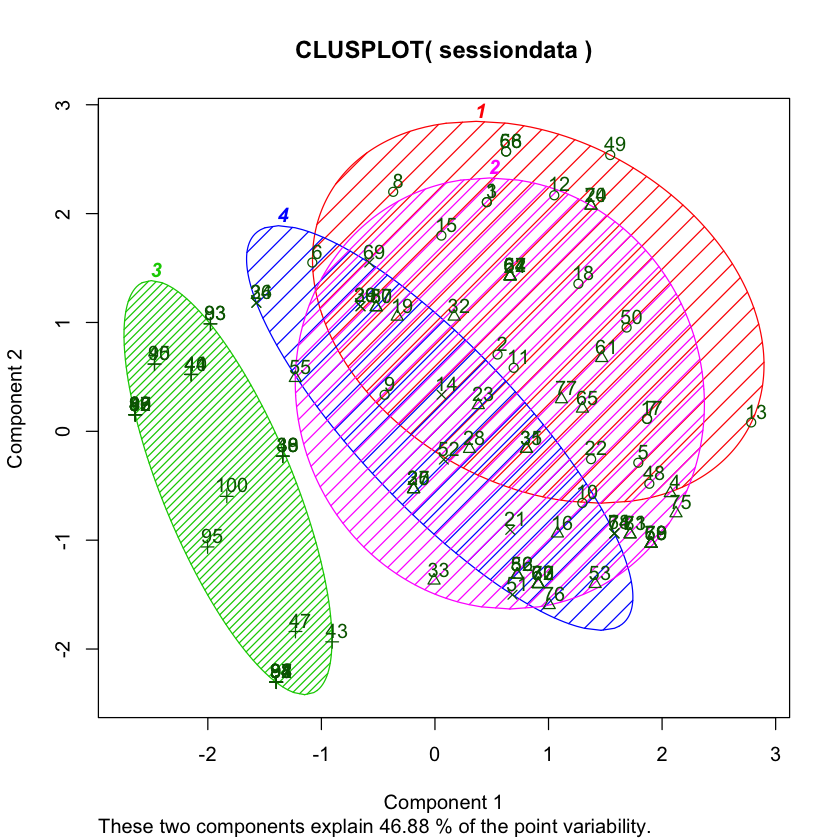

This kmean run is for a k value of : 6 
K-means clustering with 6 clusters of sizes 18, 23, 9, 14, 15, 21

Cluster means:
        Home   Products     Search     Prod_A    Prod_B    Prod_C      Cart
1 0.16666667 1.00000000 0.38888889 0.05555556 1.0000000 0.6111111 0.0000000
2 0.91304348 0.69565217 0.78260870 0.82608696 0.2173913 0.9130435 0.7391304
3 0.00000000 0.11111111 0.11111111 1.00000000 0.4444444 0.0000000 0.7777778
4 1.00000000 0.07142857 0.71428571 0.35714286 0.1428571 0.0000000 0.4285714
5 0.06666667 1.00000000 0.40000000 0.00000000 1.0000000 0.6666667 1.0000000
6 1.00000000 1.00000000 0.04761905 0.90476190 0.5238095 0.1428571 0.7619048

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  4   4   4   2   4   1   4   4   5   2   2   2   4   2   2   6   4   4   6   4 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   2   6   6   6   1   6   6   2   6   2   2   6   1   2   2   6   5   5   1 
 4

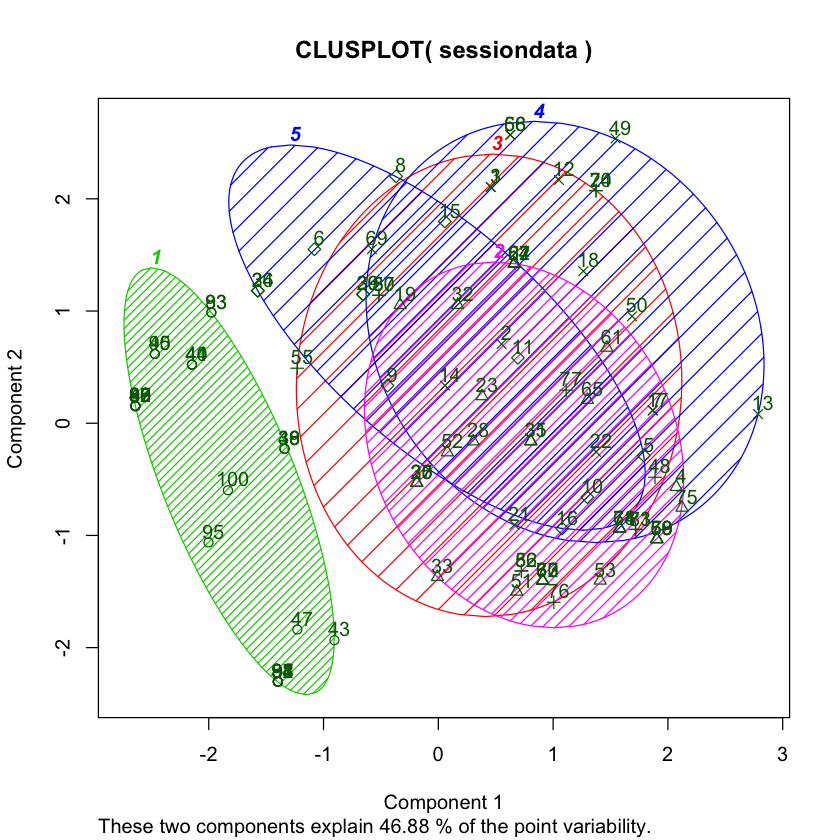

This kmean run is for a k value of : 7 
K-means clustering with 7 clusters of sizes 13, 12, 16, 19, 7, 12, 21

Cluster means:
       Home   Products     Search    Prod_A     Prod_B     Prod_C      Cart
1 0.3076923 1.00000000 1.00000000 0.0000000 1.00000000 0.46153846 0.4615385
2 1.0000000 0.08333333 0.83333333 0.1666667 0.08333333 0.08333333 0.5000000
3 0.8750000 0.87500000 0.68750000 0.8125000 0.00000000 0.87500000 0.8750000
4 0.0000000 1.00000000 0.00000000 0.0000000 1.00000000 0.78947368 0.4736842
5 1.0000000 0.28571429 1.00000000 1.0000000 0.85714286 0.85714286 0.4285714
6 0.1666667 0.16666667 0.08333333 1.0000000 0.41666667 0.00000000 0.5833333
7 1.0000000 1.00000000 0.04761905 0.9047619 0.52380952 0.14285714 0.7619048

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   2   2   3   5   1   2   2   1   5   5   5   2   3   5   7   2   2   7   6 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  3

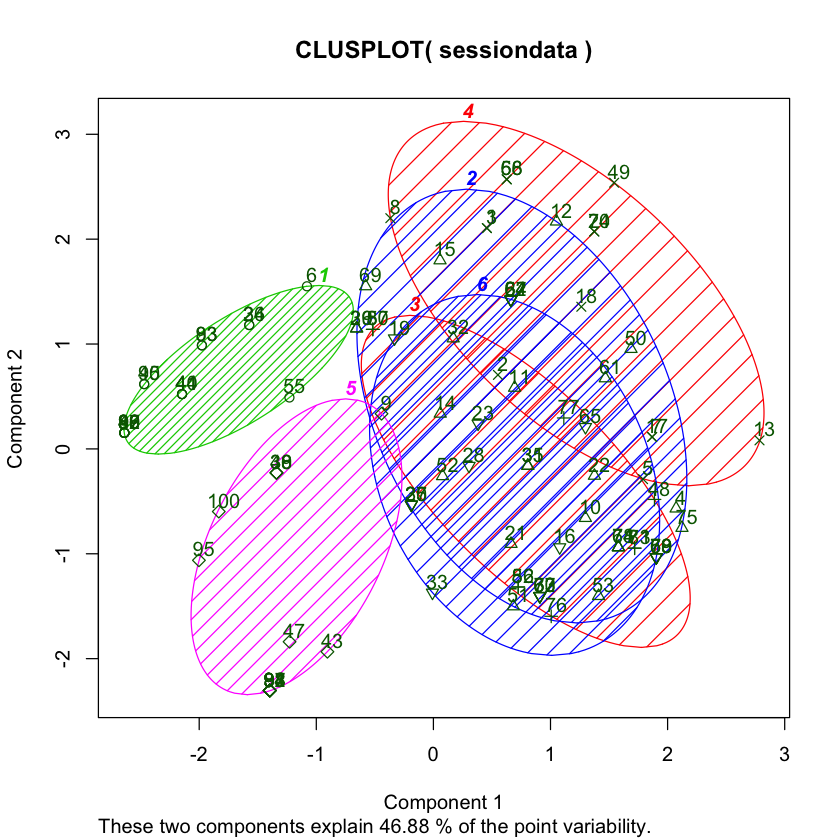

This kmean run is for a k value of : 8 
K-means clustering with 8 clusters of sizes 13, 10, 15, 11, 17, 13, 13, 8

Cluster means:
       Home  Products    Search     Prod_A     Prod_B    Prod_C      Cart
1 0.7692308 1.0000000 0.4615385 0.53846154 1.00000000 0.0000000 0.8461538
2 0.2000000 0.0000000 0.1000000 1.00000000 0.40000000 0.0000000 0.6000000
3 0.8666667 0.9333333 0.4666667 0.86666667 0.20000000 1.0000000 0.9333333
4 0.0000000 1.0000000 0.1818182 0.00000000 1.00000000 0.9090909 1.0000000
5 0.1176471 1.0000000 0.3529412 0.05882353 1.00000000 0.6470588 0.0000000
6 1.0000000 0.1538462 0.8461538 0.15384615 0.07692308 0.1538462 0.4615385
7 0.9230769 1.0000000 0.1538462 0.92307692 0.00000000 0.0000000 0.6923077
8 1.0000000 0.2500000 1.0000000 1.00000000 0.75000000 0.8750000 0.5000000

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  6   6   6   7   8   1   6   6   1   8   8   8   6   3   8   1   6   6   1   2 
 21  22  23  24  25  2

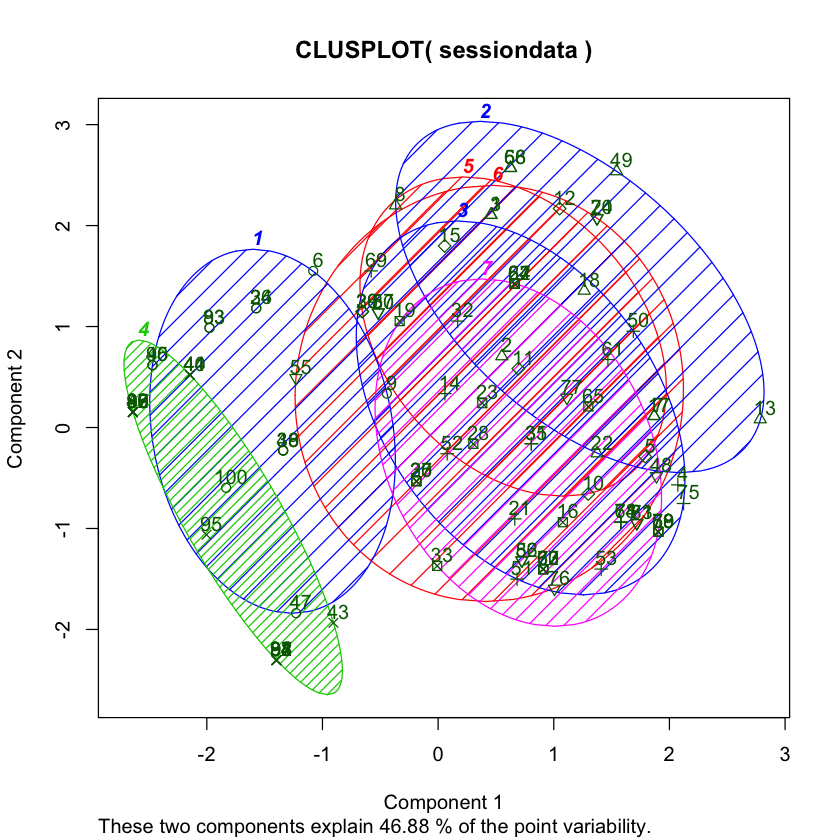

This kmean run is for a k value of : 9 
K-means clustering with 9 clusters of sizes 13, 13, 8, 9, 5, 8, 28, 9, 7

Cluster means:
       Home  Products     Search    Prod_A    Prod_B    Prod_C      Cart
1 1.0000000 0.4615385 1.00000000 0.0000000 0.3846154 0.3076923 0.4615385
2 0.9230769 1.0000000 0.07692308 0.9230769 0.6923077 0.0000000 0.5384615
3 0.0000000 0.0000000 0.12500000 1.0000000 0.5000000 0.0000000 0.7500000
4 0.8888889 1.0000000 0.22222222 0.8888889 0.0000000 0.0000000 1.0000000
5 1.0000000 0.0000000 0.20000000 0.6000000 0.0000000 0.0000000 0.0000000
6 1.0000000 0.0000000 0.87500000 1.0000000 0.5000000 0.7500000 0.7500000
7 0.0000000 1.0000000 0.32142857 0.0000000 1.0000000 0.6785714 0.5000000
8 1.0000000 1.0000000 0.22222222 1.0000000 0.5555556 1.0000000 0.6666667
9 0.7142857 1.0000000 1.00000000 0.7142857 0.0000000 1.0000000 1.0000000

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  5   1   5   4   6   1   1   1   1   6 

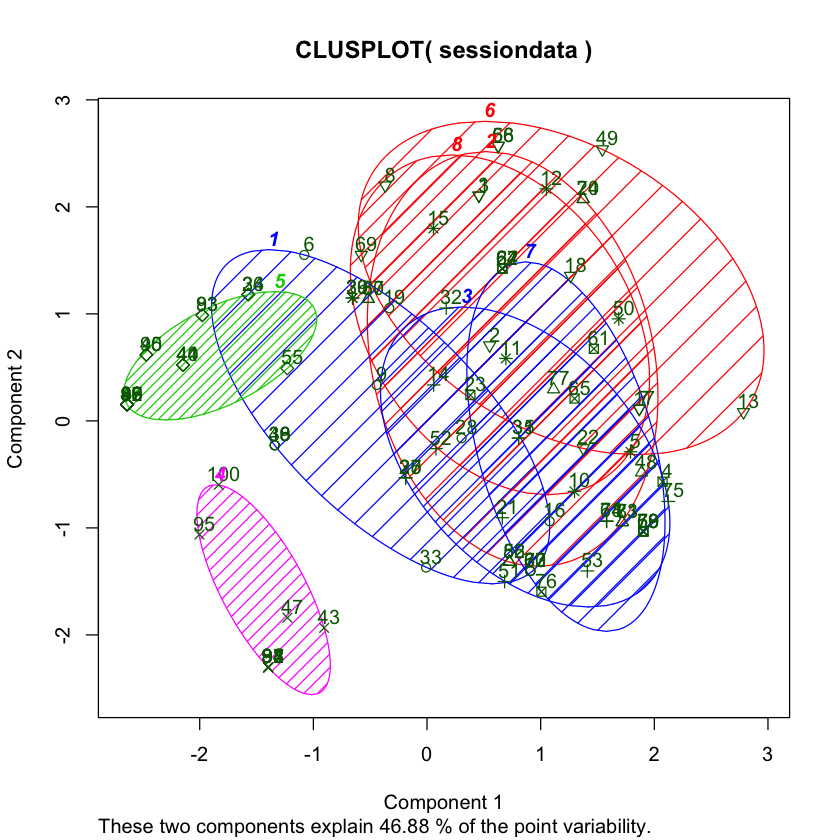

This kmean run is for a k value of : 10 
K-means clustering with 10 clusters of sizes 19, 16, 10, 6, 5, 8, 8, 4, 14, 10

Cluster means:
        Home Products Search    Prod_A    Prod_B    Prod_C      Cart
1  0.0000000     1.00  0.000 0.0000000 1.0000000 0.7894737 0.4736842
2  0.6875000     0.75  0.000 0.9375000 0.7500000 0.0000000 0.5000000
3  0.8000000     1.00  1.000 0.7000000 0.0000000 0.7000000 1.0000000
4  1.0000000     1.00  1.000 0.3333333 0.8333333 0.8333333 0.0000000
5  1.0000000     0.20  1.000 1.0000000 1.0000000 0.6000000 0.8000000
6  0.5000000     0.00  0.625 0.6250000 0.0000000 0.0000000 1.0000000
7  1.0000000     0.00  0.500 0.3750000 0.1250000 0.0000000 0.0000000
8  1.0000000     0.00  0.750 0.7500000 0.0000000 1.0000000 0.7500000
9  0.9285714     1.00  0.000 0.9285714 0.2142857 0.5000000 0.9285714
10 0.1000000     1.00  1.000 0.0000000 1.0000000 0.4000000 0.6000000

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  7 

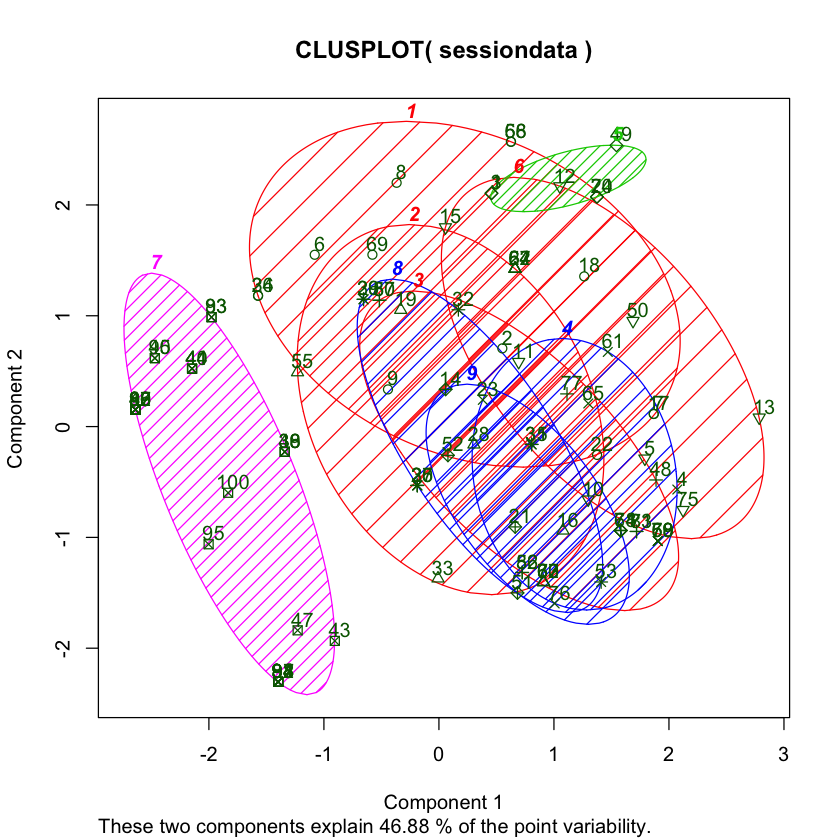

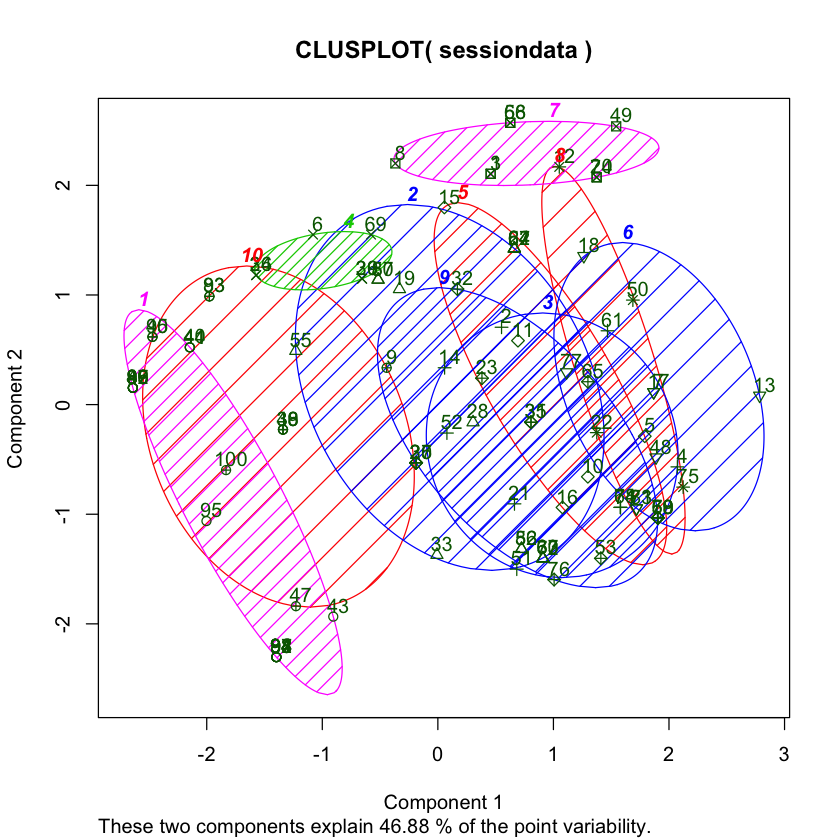

In [21]:
# Set seed data.
set.seed(23)
#Perform K-Means with 4-10 clusters
for (j in 4:10) {
  #     browser()
  kmeanscluster <- kmeans(clustersessiondata,j)
  cat("This kmean run is for a k value of :", j, "\n" )
  print(kmeanscluster)
  #Compare the clusters with purchase
  print(table(kmeanscluster$cluster, sessiondata$Purchase))
  #Plot the clusters.
  # Create a cluster plot using the first 2 principal components
  clusplot(sessiondata, kmeanscluster$cluster, color=TRUE, shade=TRUE, 
           labels=2, lines=0)
}